In [2]:
import pandas as pd
import glob

# Read all CSV files in the genre folder
genre_files = glob.glob("1_movies_per_genre/*.csv")

all_movies = []
for file in genre_files:
    df = pd.read_csv(file)
    df['genre_source'] = file.split("/")[-1].replace(".csv", "")  # optional: keep genre info from filename
    all_movies.append(df)
    
movies_df = pd.concat(all_movies, ignore_index=True)
print(movies_df.shape)
movies_df.head()

(1700, 11)


,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,genre_source
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,1_movies_per_genre\Action
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...,1_movies_per_genre\Action
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...,1_movies_per_genre\Action
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...,1_movies_per_genre\Action
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...,1_movies_per_genre\Action


In [3]:
review_files = glob.glob("2_reviews_per_movie_raw/*.csv")

reviews = []
for file in review_files:
    df = pd.read_csv(file)
    df['movie_name'] = file.split("/")[-1].replace(".csv", "")
    reviews.append(df)
    
reviews_df = pd.concat(reviews, ignore_index=True)
print(reviews_df.shape)
reviews_df.head()

(795299, 8)


,username,rating,helpful,total,date,title,review,movie_name
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",2_reviews_per_movie_raw\10 Cloverfield Lane 2016
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016


In [4]:
# Step 1: Read the descriptions CSV
descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')
# Step 2: Clean the movie title in descriptions_df if needed
descriptions_df['title_clean'] = descriptions_df['title'].str.strip().str.lower()
# Step 3: Clean the name in movies_df to match
movies_df['name_clean'] = movies_df['name'].str.strip().str.lower()
# Step 4: Merge on the cleaned titles
movies_df = pd.merge(movies_df, descriptions_df[['title_clean', 'description']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column if you want
movies_df.drop(columns=['title_clean'], inplace=True)
#movies_df = movies_df.drop(['description_y'], axis =1)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12192\2387912973.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')


In [5]:
# Step 1: Read the descriptions CSV
overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')
# Step 2: Clean the movie title in descriptions_df if needed
overview_df['title_clean'] = overview_df['original_title'].str.strip().str.lower()
# Step 3: Clean the name in movies_df to match
movies_df['name_clean'] = movies_df['name'].str.strip().str.lower()
# Step 4: Merge on the cleaned titles
movies_df = pd.merge(movies_df, overview_df[['title_clean', 'overview']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column if you want
movies_df.drop(columns=['title_clean'], inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12192\3538751893.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')


In [6]:
import pandas as pd

# Step 1: Fill NaN values in 'overview' with values from 'description'
movies_df['overview'] = movies_df['overview'].fillna(movies_df['description'])
# Step 2: Drop the 'description' column
movies_df = movies_df.drop(columns=['description'])
# Step 3: Rename 'overview' column to 'description'
movies_df = movies_df.rename(columns={'overview': 'description'})
# Optional: check how many missing descriptions are still there
missing_descriptions = movies_df['description'].isna().sum()
print(f"Missing descriptions remaining: {missing_descriptions}")

Missing descriptions remaining: 155


In [7]:
# Step 1: Drop duplicates based on name_clean and description (to avoid repeated identical rows)
movies_df = movies_df.drop_duplicates(subset=['name_clean', 'description'])

# Step 2: Sort by length of description, longest first (or choose any preference)
movies_df['desc_len'] = movies_df['description'].apply(lambda x: len(str(x)))

# Step 3: Drop duplicates based on movie name, keeping the one with longest description
movies_df_unique = movies_df.sort_values(by='desc_len', ascending=False).drop_duplicates(subset='name_clean', keep='first')

# Step 4: Drop the temporary length column
movies_df_unique = movies_df_unique.drop(columns=['desc_len'])

# (Optional) Reset index
movies_df_unique = movies_df_unique.reset_index(drop=True)

movies_df_unique.head()

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,genre_source,name_clean,description
0,Ben-Hur,1959,G,3h 32min,Adventure; Drama; History;,29 January 1960 (Brazil),8.1,213444,443,https://www.imdb.com/title/tt0052618/reviews/_...,1_movies_per_genre\History,ben-hur,Ben-Hur is a 1959 epic film directed by Willia...
1,No Man's Land,2001,R,1h 38min,Comedy; Drama; War;,19 September 2001 (France),7.9,43762,181,https://www.imdb.com/title/tt0283509/reviews/_...,1_movies_per_genre\War,no man's land,The film starts with a story about how two mon...
2,Gladiator,2000,R,2h 35min,Action; Adventure; Drama;,5 May 2000 (USA),8.5,1297718,2636,https://www.imdb.com/title/tt0172495/reviews/_...,1_movies_per_genre\Action,gladiator,"In the year 180, the death of emperor Marcus A..."
3,Hercules,1997,G,1h 33min,Animation; Adventure; Comedy;,27 June 1997 (USA),7.3,198490,218,https://www.imdb.com/title/tt0119282/reviews/_...,1_movies_per_genre\Animation,hercules,"Fourteen hundred years ago, a tormented soul w..."
4,The Rookie,2002,G,2h 7min,Drama; Sport;,29 March 2002 (USA),6.9,31474,176,https://www.imdb.com/title/tt0265662/reviews/_...,1_movies_per_genre\Sport,the rookie,Jim Morris never made it out of the minor leag...


In [8]:
import os
# Update the 'movie_name' column to remove the path and extension
reviews_df['movie_name'] = reviews_df['movie_name'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

# Example output
print(reviews_df['movie_name'].head())

0    10 Cloverfield Lane 2016
1    10 Cloverfield Lane 2016
2    10 Cloverfield Lane 2016
3    10 Cloverfield Lane 2016
4    10 Cloverfield Lane 2016
Name: movie_name, dtype: object


In [9]:
import re
# Remove the year (4 digits at the end) and strip trailing spaces
reviews_df['movie_name_clean'] = reviews_df['movie_name'].apply(lambda x: re.sub(r'\s+\d{4}$', '', x).strip())

# Preview
print(reviews_df[['movie_name', 'movie_name_clean']].head())

                 movie_name     movie_name_clean
0  10 Cloverfield Lane 2016  10 Cloverfield Lane
1  10 Cloverfield Lane 2016  10 Cloverfield Lane
2  10 Cloverfield Lane 2016  10 Cloverfield Lane
3  10 Cloverfield Lane 2016  10 Cloverfield Lane
4  10 Cloverfield Lane 2016  10 Cloverfield Lane


In [10]:
# Optional: lowercase both for consistent matching
#movies_df_unique['name_clean'] = movies_df_unique['name'].str.lower().str.strip()
reviews_df['movie_name_clean'] = reviews_df['movie_name_clean'].str.lower().str.strip()

# Then you can do a merge or match
merged_df = pd.merge(reviews_df, movies_df_unique, left_on='movie_name_clean', right_on='name_clean', how='inner')

merged_df.head()

,username,rating_x,helpful,total,date,title,review,movie_name,movie_name_clean,name,...,run_length,genres,release_date,rating_y,num_raters,num_reviews,review_url,genre_source,name_clean,description
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 Cloverfield Lane 2016,10 cloverfield lane,10 Cloverfield Lane,...,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,1_movies_per_genre\Horror,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 Cloverfield Lane 2016,10 cloverfield lane,10 Cloverfield Lane,...,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,1_movies_per_genre\Horror,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 Cloverfield Lane 2016,10 cloverfield lane,10 Cloverfield Lane,...,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,1_movies_per_genre\Horror,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",10 Cloverfield Lane 2016,10 cloverfield lane,10 Cloverfield Lane,...,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,1_movies_per_genre\Horror,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 Cloverfield Lane 2016,10 cloverfield lane,10 Cloverfield Lane,...,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,1_movies_per_genre\Horror,10 cloverfield lane,"After a car accident, Michelle awakens to find..."


In [11]:
#merged_df = merged_df.drop(['movie_name_clean'], axis =1)
merged_df = merged_df.drop(['movie_name'], axis =1)
merged_df = merged_df.drop(['name'], axis =1)
merged_df = merged_df.drop(['genre_source'], axis =1)

In [12]:
merged_df.head()

,username,rating_x,helpful,total,date,title,review,movie_name_clean,year,movie_rated,run_length,genres,release_date,rating_y,num_raters,num_reviews,review_url,name_clean,description
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,10 cloverfield lane,"After a car accident, Michelle awakens to find..."


In [13]:
merged_df.shape

(774241, 19)

In [14]:
merged_df = merged_df.dropna(subset=['description'])


In [15]:
merged_df.shape

(693136, 19)

In [16]:
missing_descriptions = merged_df['description'].isna().sum()
print(f"Missing descriptions remaining: {missing_descriptions}")

Missing descriptions remaining: 0


In [17]:
import numpy as np

# Treat placeholders as missing
merged_df['description'] = merged_df['description'].replace("No description available", np.nan)

# Optional: drop those rows
merged_df = merged_df.dropna(subset=['description'])


In [18]:
merged_df.shape

(693136, 19)

In [19]:
merged_df.head()

,username,rating_x,helpful,total,date,title,review,movie_name_clean,year,movie_rated,run_length,genres,release_date,rating_y,num_raters,num_reviews,review_url,name_clean,description
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,10 cloverfield lane,"After a car accident, Michelle awakens to find..."


In [20]:
print(merged_df.dtypes)


username             object
rating_x             object
helpful               int64
total                 int64
date                 object
title                object
review               object
movie_name_clean     object
year                  int64
movie_rated          object
run_length           object
genres               object
release_date         object
rating_y            float64
num_raters            int64
num_reviews           int64
review_url           object
name_clean           object
description          object
dtype: object


In [21]:
columns_to_drop = ['movie_rated', 'release_date', 'review_url', 'movie_name_clean', 'date']
merged_df = merged_df.drop(columns=columns_to_drop)


In [22]:
print(merged_df.columns)
print(merged_df.shape)


Index(['username', 'rating_x', 'helpful', 'total', 'title', 'review', 'year',
       'run_length', 'genres', 'rating_y', 'num_raters', 'num_reviews',
       'name_clean', 'description'],
      dtype='object')
(693136, 14)


In [23]:
num_duplicates = merged_df.duplicated().sum()
print(f"🔁 Duplicate rows: {num_duplicates}")


🔁 Duplicate rows: 1


In [24]:
merged_df = merged_df.drop_duplicates()


In [25]:
null_summary = merged_df.isnull().sum()
print("🕳️ Null values per column:\n", null_summary[null_summary > 0])


🕳️ Null values per column:
 Series([], dtype: int64)


In [26]:
merged_df.shape

(693135, 14)

In [27]:
import pandas as pd
import numpy as np
import re

def transform_merged_df(df):
    # 1. Convert numeric columns where necessary
    df['rating_x'] = pd.to_numeric(df['rating_x'], errors='coerce')  # Convert to float, handle errors
    df['rating_y'] = pd.to_numeric(df['rating_y'], errors='coerce')  # Already float, but we process 'rating_x' too
    df['helpful'] = pd.to_numeric(df['helpful'], errors='coerce')
    df['total'] = pd.to_numeric(df['total'], errors='coerce')
    df['num_raters'] = pd.to_numeric(df['num_raters'], errors='coerce')
    df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

    # 2. Convert runtime (e.g., "1h 43min" -> 103 minutes)
    def parse_runtime(s):
        if pd.isna(s):
            return np.nan
        match = re.match(r'(?:(\d+)h)?\s*(?:(\d+)min)?', str(s))
        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
        return np.nan
    
    df['run_length'] = df['run_length'].apply(parse_runtime)

    # 3. Clean string/text columns and handle 'no description', empty strings
    text_cols = ['username', 'title', 'review', 'genres', 'name_clean', 'description']
    for col in text_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower()
            df[col] = df[col].replace(['nan', 'null', '', 'none', 'no description', '0'], np.nan)

    # 4. Drop rows where important info is missing
    required_cols = ['description', 'genres', 'rating_y']
    df = df.dropna(subset=required_cols)

    # 5. Drop duplicates (if necessary)
    df = df.drop_duplicates()

    return df


In [54]:
merged_df = transform_merged_df(merged_df)


In [55]:
print(merged_df.dtypes)


username        object
rating_x       float64
helpful          int64
total            int64
title           object
review          object
year             int64
run_length       int64
genres          object
rating_y       float64
num_raters       int64
num_reviews      int64
name_clean      object
description     object
dtype: object


In [56]:
# After cleaning user_rating if needed
merged_df['rating_x'] = pd.to_numeric(merged_df['rating_x'], errors='coerce')

# Count how many null (NaN) values are there in 'user_rating'
null_count = merged_df['rating_x'].isnull().sum()

print(f"Number of nulls in 'user_rating': {null_count}")

# Now drop rows where 'user_rating' is null
merged_df = merged_df.dropna(subset=['rating_x'])

# Reset index after dropping rows
merged_df = merged_df.reset_index(drop=True)
merged_df.shape


Number of nulls in 'user_rating': 0


(614698, 14)

In [57]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Select only required columns
df = merged_df[['description', 'genres']].copy()

# Step 2: Drop rows with missing descriptions or genres
df = df.dropna(subset=['description', 'genres'])

# Step 3: Split genres into lists
df['genres_list'] = df['genres'].apply(lambda x: x.strip(';').split(';'))

# Step 4: Convert genres to binary multi-label format
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genres_list'])

# Step 5: Extract description as features
X = df['description'].tolist()

# Optional: Check
print(f"Number of samples: {len(X)}")
print("Genres:", mlb.classes_)


Number of samples: 614698
Genres: [' action' ' adventure' ' biography' ' comedy' ' crime' ' drama'
 ' fantasy' ' history' ' horror' ' music' ' mystery' ' romance' ' sci-fi'
 ' sport' ' thriller' ' war' ' western' 'action' 'adventure' 'animation'
 'biography' 'comedy' 'crime' 'drama' 'fantasy' 'horror' 'mystery'
 'romance' 'sci-fi' 'thriller']


In [58]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import numpy as np



In [59]:
# Load pre-trained DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')



In [60]:
# Function to generate DistilBERT embeddings in batches
def get_distilbert_embeddings_in_batches(texts, batch_size=16):
    embeddings = []
    
    # Process texts in smaller batches
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        
        # Tokenize the batch
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors='pt', max_length=128)
        
        with torch.no_grad():
            # Get the embeddings from the model
            outputs = model(**inputs)
        
        # Take the mean of all token embeddings for each input
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
        embeddings.append(batch_embeddings)
    
    return np.concatenate(embeddings, axis=0)



In [61]:
# Step 1: Sample a subset of the dataset (10% of the data)
sample_data = merged_df.sample(n=1000, random_state=42).reset_index(drop=True)  

In [62]:
# Extract descriptions for the sampled data
X_sample = sample_data['description'].tolist()

In [63]:
# Step 2: Generate DistilBERT embeddings for the sampled data
X_sample_embeddings = get_distilbert_embeddings_in_batches(X_sample)

In [64]:
# Optional: Check the shape of the embeddings
print(f"Shape of the embeddings for sampled data: {X_sample_embeddings.shape}")

Shape of the embeddings for sampled data: (1000, 768)


In [65]:
from sklearn.preprocessing import MultiLabelBinarizer

# Clean and split the genres
sample_data['genres_clean'] = sample_data['genres'].fillna('').apply(lambda x: [g.strip().lower() for g in x.split(';') if g.strip()])

# Binarize the genre labels
mlb = MultiLabelBinarizer()
y_sample = mlb.fit_transform(sample_data['genres_clean'])

print(f"Number of unique genres: {len(mlb.classes_)}")


Number of unique genres: 18


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sample_embeddings, y_sample, test_size=0.2, random_state=42
)


In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Create the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(256,), activation='relu', solver='adam', max_iter=30, random_state=42)

# Train the model
mlp.fit(X_train, y_train)


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256,), max_iter=30, random_state=42)

In [69]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predict probabilities
y_pred_prob = mlp.predict_proba(X_test)

# Convert predicted probabilities to binary using threshold 0.5
y_pred_binary = (y_pred_prob >= 0.3).astype(int)

# Evaluate
print("🎯 Accuracy Score:", accuracy_score(y_test, y_pred_binary))
print("🧠 F1 Score (macro):", f1_score(y_test, y_pred_binary, average='macro'))

# Detailed per-class report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))


🎯 Accuracy Score: 0.16
🧠 F1 Score (macro): 0.5467132168783029

📋 Classification Report:
              precision    recall  f1-score   support

      action       0.73      0.75      0.74        65
   adventure       0.69      0.81      0.75        54
   animation       0.70      0.64      0.67        11
   biography       0.68      0.65      0.67        20
      comedy       0.41      0.73      0.53        33
       crime       0.58      0.59      0.58        32
       drama       0.70      0.89      0.78       100
     fantasy       0.38      0.20      0.26        15
     history       0.67      0.38      0.48        16
      horror       0.87      0.76      0.81        17
       music       0.50      0.09      0.15        11
     mystery       0.33      0.44      0.38        18
     romance       0.50      0.40      0.44        20
      sci-fi       0.71      0.67      0.69        36
       sport       1.00      0.67      0.80         9
    thriller       0.52      0.63      0.57    

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


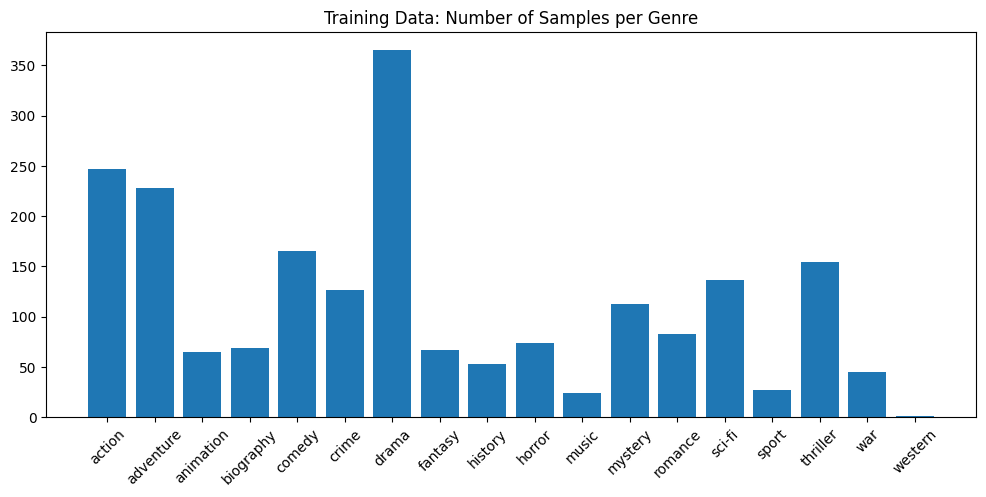

In [70]:
import matplotlib.pyplot as plt

genre_counts = y_train.sum(axis=0)
plt.figure(figsize=(12, 5))
plt.bar(mlb.classes_, genre_counts)
plt.xticks(rotation=45)
plt.title("Training Data: Number of Samples per Genre")
plt.show()


In [73]:
from skmultilearn.model_selection import iterative_train_test_split

In [74]:
# Show a few raw values from the 'genres' column
print(sample_data['genres'].head(10))


0                         romance;
1                  drama; fantasy;
2       action; adventure; sci-fi;
3               action; adventure;
4                           drama;
5       action; adventure; sci-fi;
6    animation; adventure; comedy;
7        biography; comedy; drama;
8           drama; music; romance;
9       biography; drama; history;
Name: genres, dtype: object


In [75]:
print(sample_data['genres'].apply(type).value_counts())


genres
<class 'str'>    1000
Name: count, dtype: int64


In [77]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertModel
from skmultilearn.model_selection import iterative_train_test_split

# Load and preprocess the dataset
sample_data = merged_df.sample(n=1000, random_state=42).reset_index(drop=True)
sample_data = sample_data.dropna(subset=['description', 'genres'])

# Clean genre strings
def parse_genre_string(genre_str):
    return [g.strip().lower() for g in genre_str.strip(';').split(';') if g.strip()]

sample_data['genres_cleaned'] = sample_data['genres'].apply(parse_genre_string)

# Extract all unique genres
genres = sorted(list(set(g for sublist in sample_data['genres_cleaned'] for g in sublist)))
print("Genres found in data:", genres)

y_sample = sample_data['genres_cleaned'].apply(lambda x: [genre in x for genre in genres])
y_sample = np.array(y_sample.tolist())

# Load pre-trained DistilBERT model/tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model_bert = DistilBertModel.from_pretrained('distilbert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generate DistilBERT embeddings
def get_distilbert_embeddings_in_batches(texts, batch_size=16):
    embeddings = []
    model_bert.to(device)
    model_bert.eval()
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors='pt', max_length=128)
        with torch.no_grad():
            outputs = model_bert(**inputs.to(device))
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.append(batch_embeddings)
    return np.concatenate(embeddings, axis=0)

X_sample = sample_data['description'].tolist()
X_sample_embeddings = get_distilbert_embeddings_in_batches(X_sample)

X_np = X_sample_embeddings.astype(np.float32)
y_np = y_sample.astype(np.float32)

X_train, y_train, X_test, y_test = iterative_train_test_split(X_np, y_np, test_size=0.2)

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

print("Train label counts per genre:", y_train.sum(dim=0).cpu().numpy())
print("Test label counts per genre:", y_test.sum(dim=0).cpu().numpy())

# Define model
class GenreClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GenreClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.net(x)

input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
model = GenreClassifier(input_dim, output_dim).to(device)

# Use BCEWithLogitsLoss for raw output (no sigmoid)
pos_weights = torch.tensor((y_train.shape[0] / y_train.sum(dim=0)) - 1).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, X_train, y_train, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

train_model(model, X_train, y_train, criterion, optimizer, epochs=50)

# Evaluation
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = torch.sigmoid(model(X_test))
        predictions = (outputs > 0.5).float()
        accuracy = accuracy_score(y_test.cpu(), predictions.cpu())
        print(f"Accuracy: {accuracy:.4f}")
        print(classification_report(y_test.cpu(), predictions.cpu(), target_names=genres))

evaluate_model(model, X_test, y_test)


Genres found in data: ['action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western']
Train label counts per genre: [247. 226.  61.  71. 158. 126. 372.  66.  56.  73.  28. 104.  82. 135.
  28. 150.  41.   2.]
Test label counts per genre: [65. 56. 15. 18. 40. 32. 93. 16. 13. 18.  7. 26. 21. 37.  8. 39. 13.  1.]
Epoch [10/50], Loss: 1.1186


C:\Users\Hp\AppData\Local\Temp\ipykernel_12192\804054308.py:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pos_weights = torch.tensor((y_train.shape[0] / y_train.sum(dim=0)) - 1).to(device)


Epoch [20/50], Loss: 0.9424
Epoch [30/50], Loss: 0.7788
Epoch [40/50], Loss: 0.6762
Epoch [50/50], Loss: 0.6081
Accuracy: 0.0446
              precision    recall  f1-score   support

      action       0.63      0.75      0.69        65
   adventure       0.58      0.79      0.67        56
   animation       0.43      0.87      0.58        15
   biography       0.32      0.83      0.46        18
      comedy       0.43      0.75      0.55        40
       crime       0.60      0.81      0.69        32
       drama       0.73      0.72      0.72        93
     fantasy       0.20      0.75      0.32        16
     history       0.28      0.77      0.41        13
      horror       0.41      1.00      0.58        18
       music       0.20      1.00      0.33         7
     mystery       0.35      0.92      0.51        26
     romance       0.39      0.76      0.52        21
      sci-fi       0.50      0.81      0.62        37
       sport       0.44      1.00      0.62         8
    th

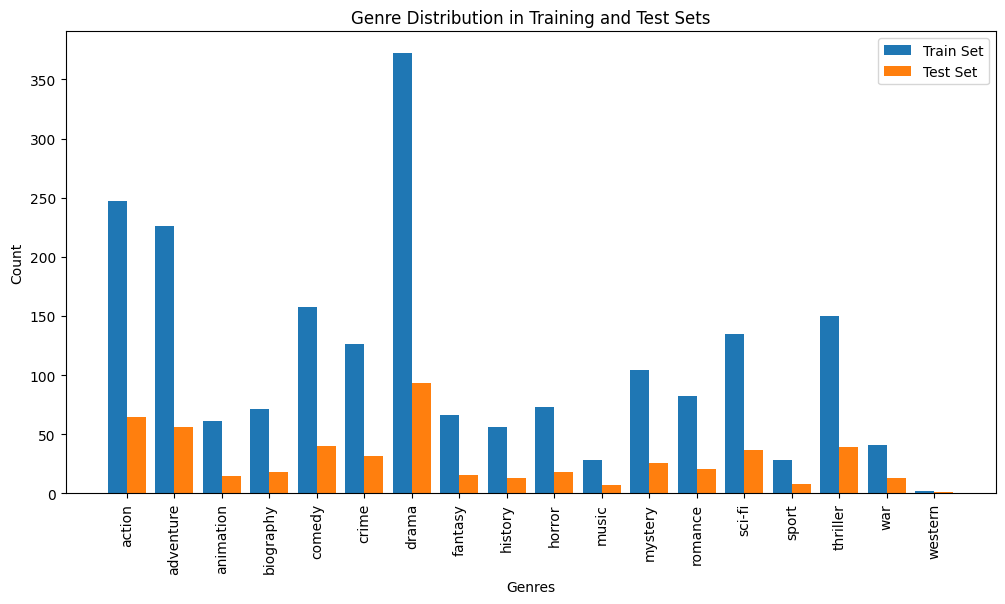

In [78]:
import matplotlib.pyplot as plt

# Plot class distribution for genres in the training and test set
def plot_class_distribution(y_train, y_test, genres):
    train_genre_counts = y_train.sum(axis=0)
    test_genre_counts = y_test.sum(axis=0)
    
    plt.figure(figsize=(12, 6))
    x = np.arange(len(genres))
    
    # Plotting the bar chart for both training and test data
    plt.bar(x - 0.2, train_genre_counts, 0.4, label='Train Set')
    plt.bar(x + 0.2, test_genre_counts, 0.4, label='Test Set')
    
    plt.xticks(x, genres, rotation=90)
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.title('Genre Distribution in Training and Test Sets')
    plt.legend()
    plt.show()

# Plot class distribution
plot_class_distribution(y_train.cpu().numpy(), y_test.cpu().numpy(), genres)


Epoch [10/50], Loss: 0.5452563762664795
Epoch [20/50], Loss: 0.5095001459121704
Epoch [30/50], Loss: 0.46604928374290466
Epoch [40/50], Loss: 0.42049315571784973
Epoch [50/50], Loss: 0.3920515775680542


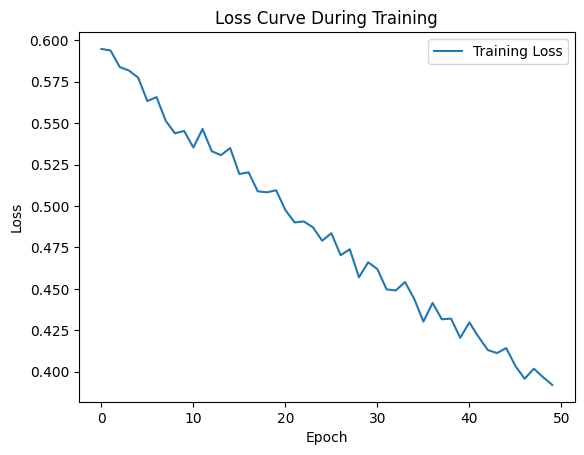

In [79]:
# Modify training function to store loss
def train_model_with_loss_tracking(model, X_train, y_train, criterion, optimizer, epochs=10):
    model.train()
    loss_history = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        loss_history.append(loss.item())  # Store the loss
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}")
    
    return loss_history

# Train the model and get the loss history
loss_history = train_model_with_loss_tracking(model, X_train, y_train, criterion, optimizer, epochs=50)

# Plotting the loss curve
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve During Training')
plt.legend()
plt.show()


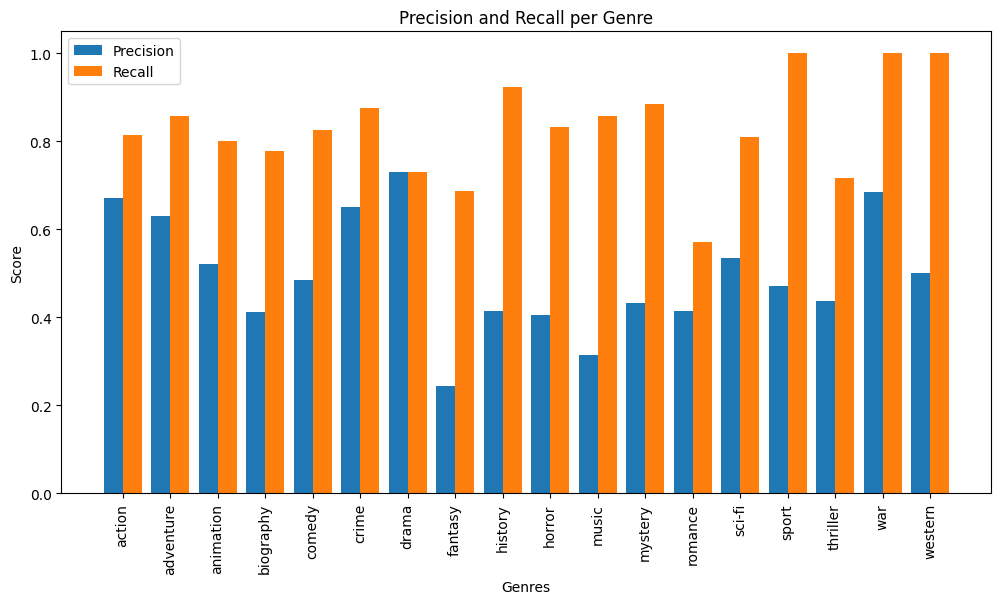

In [81]:
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracy (precision and recall) for each genre
def genre_accuracy_performance(y_true, y_pred, genres):
    precision_per_genre = []
    recall_per_genre = []
    
    for i, genre in enumerate(genres):
        precision = precision_score(y_true[:, i], y_pred[:, i])
        recall = recall_score(y_true[:, i], y_pred[:, i])
        precision_per_genre.append(precision)
        recall_per_genre.append(recall)
        
    # Plotting precision and recall
    plt.figure(figsize=(12, 6))
    x = np.arange(len(genres))
    
    plt.bar(x - 0.2, precision_per_genre, 0.4, label='Precision')
    plt.bar(x + 0.2, recall_per_genre, 0.4, label='Recall')
    
    plt.xticks(x, genres, rotation=90)
    plt.xlabel('Genres')
    plt.ylabel('Score')
    plt.title('Precision and Recall per Genre')
    plt.legend()
    plt.show()

# Get predictions for evaluating accuracy
with torch.no_grad():
    # Make predictions on the test set
    y_pred = torch.sigmoid(model(X_test))  # Apply sigmoid to output logits
    y_pred_bin = (y_pred > 0.5).float()  # Convert to binary predictions using threshold 0.5

# Plot precision and recall per genre
genre_accuracy_performance(y_test.cpu().numpy(), y_pred_bin.cpu().numpy(), genres)


In [83]:
# Function to predict the genre for a given movie name or description
def predict_genre(movie_name_or_description, model, tokenizer, device, genres):
    # Preprocess the input text (movie name or description)
    inputs = tokenizer(movie_name_or_description, padding=True, truncation=True, return_tensors='pt', max_length=128)
    inputs = inputs.to(device)
    
    # Get embeddings from DistilBERT
    with torch.no_grad():
        outputs = model_bert(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
    
    # Convert to tensor for model prediction
    embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32).to(device)
    
    # Get genre predictions
    model.eval()
    with torch.no_grad():
        outputs = torch.sigmoid(model(embeddings_tensor))
        predictions = (outputs > 0.5).float()  # Threshold to get binary output (0 or 1)
    
    # Map predicted genres back to human-readable format
    predicted_genres = [genres[i] for i in range(len(genres)) if predictions[0][i] == 1]
    return predicted_genres

# Test with a sample movie name or description
sample_movie = "The Dark Knight"

# Predict genre for the sample movie
predicted_genres = predict_genre(sample_movie, model, tokenizer, device, genres)

print(f"Predicted genres for '{sample_movie}': {predicted_genres}")


Predicted genres for 'The Dark Knight': ['action', 'adventure', 'animation', 'comedy', 'fantasy']


In [84]:
# Example movies and their actual genres (for evaluation)
test_movies = [
    ("The Dark Knight", ["action", "crime", "drama"]),
    ("The Godfather", ["crime", "drama"]),
    ("Toy Story", ["animation", "adventure", "comedy"])
]

# Evaluate predictions
for movie, actual_genres in test_movies:
    predicted_genres = predict_genre(movie, model, tokenizer, device, genres)
    print(f"Movie: {movie}")
    print(f"Predicted genres: {predicted_genres}")
    print(f"Actual genres: {actual_genres}")
    print("-" * 40)


Movie: The Dark Knight
Predicted genres: ['action', 'adventure', 'animation', 'comedy', 'fantasy']
Actual genres: ['action', 'crime', 'drama']
----------------------------------------
Movie: The Godfather
Predicted genres: ['biography', 'comedy', 'drama', 'music', 'sport']
Actual genres: ['crime', 'drama']
----------------------------------------
Movie: Toy Story
Predicted genres: ['adventure', 'animation', 'comedy']
Actual genres: ['animation', 'adventure', 'comedy']
----------------------------------------
